In [1]:
from paho.mqtt import client as mqtt_client
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import os
import json
from utils import *

import sys
import time
from IPython.display import display, clear_output
import torch
from envs import OptimizationEnv
from sac import SoftActorCritic
from rlutils import ReturnTracker, ReplayBuffer

In [2]:
broker = 'localhost'
port = 10401 # 1883
client_id = 'local_listener-secondary'
username = 'fwagner'
password = '1234'

In [8]:
def receive_and_print(client, userdata, msg):
    
    try:
        print(time.time(), msg.topic)
        data = json.loads(msg.payload)
        for k,v in zip(data.keys(), data.values()):
            if k == 'Samples':
                pass
            else:
                print(k, v)
        if 'TPA' in data and 'RMS' in data and 'PulseHeight' in data:
            print('Reward: ', - data['RMS'] * data['TPA'] / np.maximum(data['PulseHeight'], data['RMS']) )
        if 'Samples' in data:
            plt.plot(np.array(data['Samples'])/65536*10)
            plt.show()

    except KeyError as err_msg:
        print('KeyError: ', err_msg)
        pass

In [9]:
client = connect_mqtt(broker, port, client_id, username, password, userdata={})

In [10]:
subscribe(client, 'ccscresst/subscription/set')
subscribe(client, 'ccscresst/subscription/ack')
subscribe(client, 'ccscresst/trigger/samples')
subscribe(client, 'ccscresst/control/set')
subscribe(client, 'ccscresst/control/ack')

In [11]:
client.on_message = receive_and_print

In [7]:
# payload = {
#     "ChannelID": 1,
#     "DAC": 1.6,  # normed to [-1,1]
#     "BiasCurrent": 2.4,  # normed to [-1,1]
# }

# result = client.publish('ccscresst/control/set', json.dumps(payload))
# check(result)

In [7]:
channel_info = {"SubscribeToChannel": 1}
result = client.publish('ccscresst/subscription/set', json.dumps(channel_info))
check(result)

Connected to MQTT Broker!
1676543900.4352179 ccscresst/trigger/samples
BiasCurrent 0.0
ChannelID 1
DAC 4.999696254730225
LBaseline -3.2293701171875
PulseHeight 0.0018310546875
RMS 0.004008846823126078
TPA 3.0
Reward:  -3.0


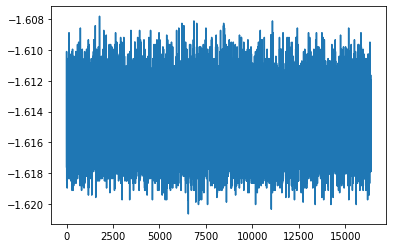

1676543900.72135 ccscresst/trigger/samples
BiasCurrent 0.0
ChannelID 1
DAC 4.999696254730225
LBaseline -3.22906494140625
PulseHeight 0.001220703125
RMS 0.004067859146744013
TPA 4.0
Reward:  -4.0


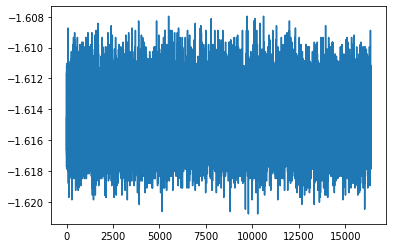

KeyboardInterrupt: 

In [12]:
client.loop_forever()